In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Задание 1

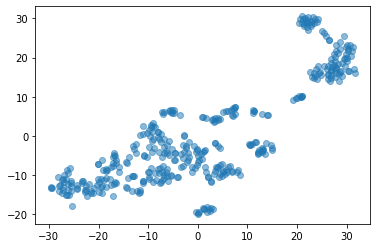

In [14]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5)
plt.show()

## Задание 2

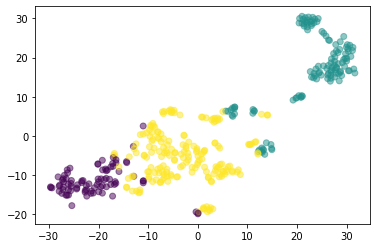

Price train:
Кластер 0: 0    27.788372
dtype: float64
Кластер 1: 0    16.165354
dtype: float64
Кластер 2: 0    24.958115
dtype: float64

 CRIM train:
Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851
Кластер 2: 0.4216602094240837


In [15]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, alpha=0.5)
plt.show()

print('Price train:')
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2].mean()))

print('\n CRIM train:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

## Задание 3

In [16]:
labels_test = model.fit_predict(X_test_scaled)

print('\n Price test:')
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2].mean()))

print('\n CRIM test:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))


 Price test:
Кластер 0: 0    33.871429
dtype: float64
Кластер 1: 0    21.55283
dtype: float64
Кластер 2: 0    16.437143
dtype: float64

 CRIM test:
Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
